In [48]:
using LinearAlgebra
using PyPlot

In [49]:
#Continuous Dynamics
function dynamics(x)
    g = 9.81
    
    r = x[1:2]
    v = x[3:4]
    
    v̇ = [0; -g]
    
    xdot = [v; v̇]
end

dynamics (generic function with 1 method)

In [50]:
function dynamics_rk4(x)
    #RK4 integration with zero-order hold on u
    f1 = dynamics(x)
    f2 = dynamics(x + 0.5*h*f1)
    f3 = dynamics(x + 0.5*h*f2)
    f4 = dynamics(x + h*f3)
    return x + (h/6.0)*(f1 + 2*f2 + 2*f3 + f4)
end

dynamics_rk4 (generic function with 1 method)

In [51]:
#guard function
function guard(x)
    return x[2]
end

guard (generic function with 1 method)

In [80]:
#jump map
function jump(x)
    #Flip sign of vertical component of velocity and multiply by coefficient of restitution
    γ = 0.9
    xn = [x[1]; 0.0; x[3]; -γ*x[4]]
end

jump (generic function with 1 method)

In [81]:
#Initial Conditions
r0 = [0; 1.0]
v0 = [1.0; 0]
x0 = [r0; v0];

In [82]:
#Simulate
Nx = 4
h = 0.01 #100 Hz
Tfinal = 3.0 # final time
Nt = Int(Tfinal/h)+1   # number of time steps
thist = Array(range(0,h*(Nt-1), step=h));
xhist = zeros(Nx,Nt)
xhist[:,1] = x0
for k = 1:(Nt-1)
    xhist[:,k+1] = dynamics_rk4(xhist[:,k])
    if guard(xhist[:,k+1]) <= 0
        #interpolate back to guard=0
        
        xhist[:,k+1] = jump(xhist[:,k+1])
    end 
end

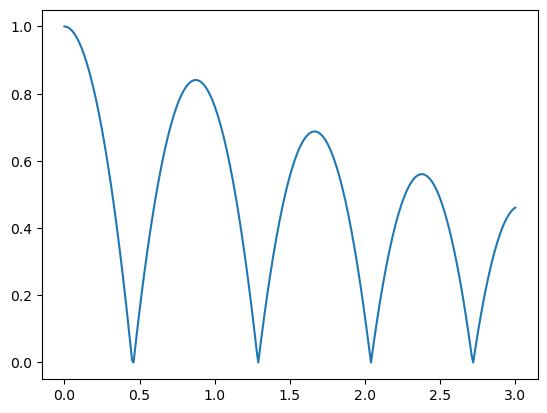

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa871b6fca0>

In [83]:
plot(xhist[1,:],xhist[2,:])

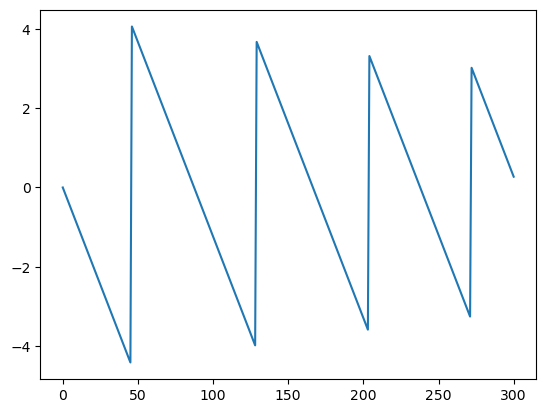

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa870abb190>

In [67]:
plot(xhist[4,:])